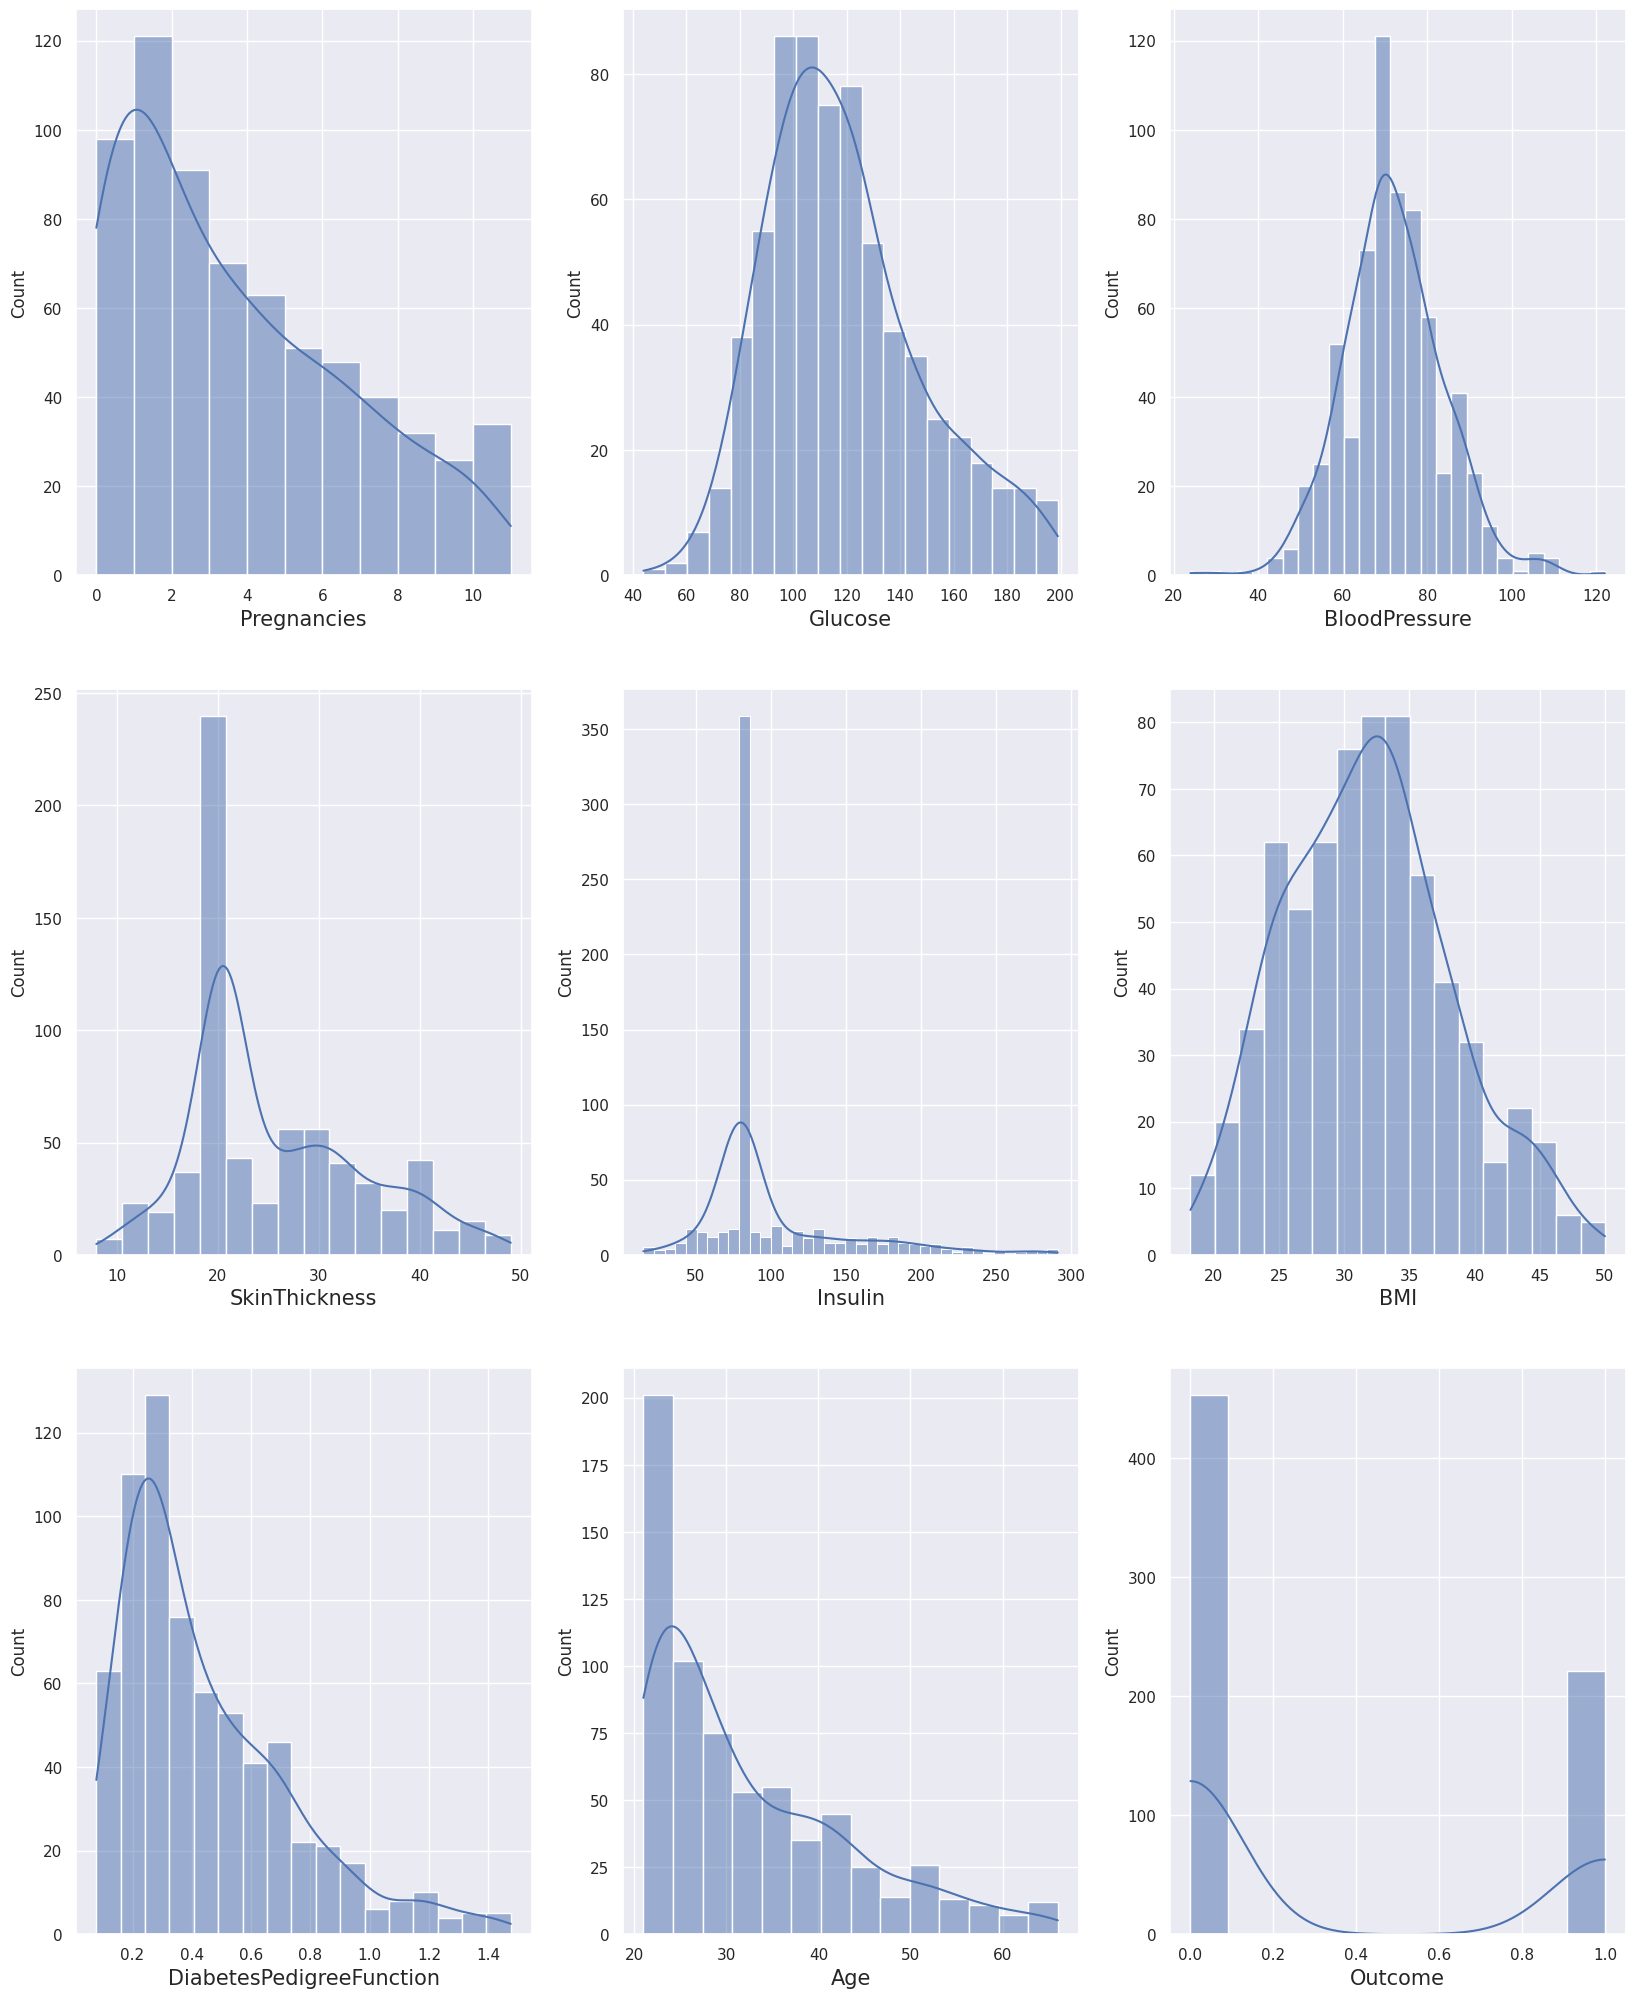

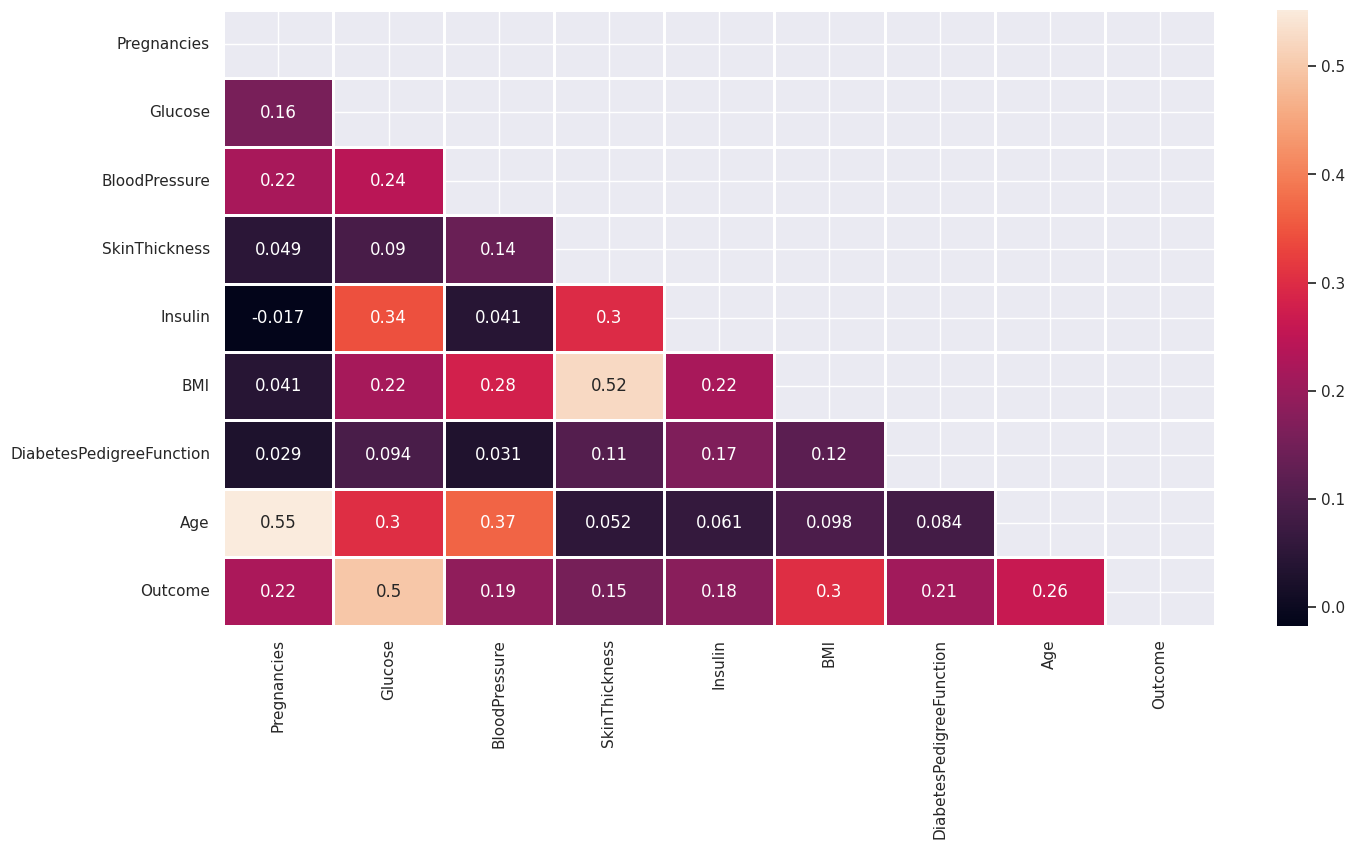

k-NN Cross-Validation Scores: [0.74257426 0.71287129 0.8019802  0.68316832 0.78217822]
SVM Cross-Validation Scores: [0.74257426 0.75247525 0.81188119 0.78217822 0.77227723]

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       117
           1       0.63      0.46      0.53        52

    accuracy                           0.75       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.74      0.75      0.74       169


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       117
           1       0.64      0.54      0.58        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.76      0.76      0.76       169



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

sns.set()

# Load data
data = pd.read_csv('/content/diabetes prediction dataset.csv')

# Handle zero values
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

# Remove outliers
outlier = data['Pregnancies'].quantile(0.98)
data = data[data['Pregnancies'] < outlier]
outlier = data['BMI'].quantile(0.99)
data = data[data['BMI'] < outlier]
outlier = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness'] < outlier]
outlier = data['Insulin'].quantile(0.95)
data = data[data['Insulin'] < outlier]
outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
data = data[data['DiabetesPedigreeFunction'] < outlier]
outlier = data['Age'].quantile(0.99)
data = data[data['Age'] < outlier]

# Visualize data
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 8))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=1)
plt.show()

# Prepare data
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
knn = KNeighborsClassifier()
svm = SVC()

# Perform k-fold cross-validation
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Train models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
knn_y_pred = knn.predict(X_test)
svm_y_pred = svm.predict(X_test)

# Evaluation
knn_report = classification_report(y_test, knn_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

# Print results
print("k-NN Cross-Validation Scores:", knn_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)

print("\nk-NN Classification Report:")
print(knn_report)

print("\nSVM Classification Report:")
print(svm_report)
